In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import os
import numpy as np
import pandas as pd
import torch
import torch as th
from os.path import join
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import trange, tqdm

/tmp/ipykernel_2728945/2612853015.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [4]:
import sys 
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")
from tensorboard_utils import extract_all_runs, extract_tensorboard_data_from_run, extract_last_step_summary, extract_last_K_step_avg_summary
from posthoc_analysis_utils import sweep_collect_eval_data, extract_rule_list_from_eval_col_Diffusion, format_rule_list_to_mat, visualize_indiv_rule_dynam, extract_and_convert

### Set Paths

In [6]:
tabdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Tables"
# figdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Figures_newrule"

GPT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven"
DiT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results"
SiT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/SiT/results"
SSM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/Mamba_raven"
EDM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps"

In [36]:
figroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning"
GPTfigdir = join(figroot, "GPT2_raven")
EDMfigdir = join(figroot, "EDM_raven")
DiTfigdir = join(figroot, "DiT_raven")
SiTfigdir = join(figroot, "SiT_raven")
SSMfigdir = join(figroot, "SSM_raven")
synopsisdir = join(figroot, "Figure_model_synopsis")

In [37]:
!mkdir {synopsisdir}

mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/Figure_model_synopsis’: File exists


In [9]:
import pandas as pd
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 100)

In [8]:
!mkdir  /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/GPT2_raven
!mkdir  /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/EDM_raven
!mkdir  /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/DiT_raven
!mkdir  /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/SiT_raven
!mkdir  /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/SSM_raven

mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/GPT2_raven’: File exists
mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/EDM_raven’: File exists
mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/DiT_raven’: File exists
mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/SiT_raven’: File exists
mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/SSM_raven’: File exists


## EDM

In [151]:
tb_data_col_EDM = extract_all_runs(EDM_exproot)

Extracted data from BaseBlnrX3_new_stream0_16M_RAVEN10_abstract_20240921-2218/tensorboard_logs
Extracted data from WideBlnrX3_new_stream0_016M_RAVEN10_abstract_20240816-0105/tensorboard_logs
Extracted data from WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs
Extracted data from WideBlnrX3_new_stream0_48M_RAVEN10_abstract_20240705-1908/tensorboard_logs
Extracted data from BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2314/tensorboard_logs
Extracted data from WideBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0105/tensorboard_logs
Extracted data from BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs
Extracted data from BigBlnrX3_new_stream1_6M_RAVEN10_abstract_20240705-1903/tensorboard_logs
Extracted data from BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs
Extracted data from BigBlnrX3_new_stream16M_RAVEN10_abstract_20240705-0237/tensorboard_logs
Extracted d

In [152]:
for key in tb_data_col_EDM.keys():
    if tb_data_col_EDM[key]["step"].max() < 999999:
        print(key)
        print(tb_data_col_EDM[key]["step"].max(), "steps, unfinished")

BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs
75200 steps, unfinished
WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs
67500 steps, unfinished
BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs
79200 steps, unfinished
WideBlnrX3_new_stream4_8M_RAVEN10_abstract_20240921-2016/tensorboard_logs
897300 steps, unfinished
WideBlnrX3_new_stream4_8M_RAVEN10_abstract_20240705-1908/tensorboard_logs
873100 steps, unfinished


In [61]:
def simplify_runname_EDM(run_name):
    return run_name.replace("/tensorboard_logs", "").split("_2024")[0].replace("_RAVEN10_abstract", "")#.replace("_new", "")

syndf_EDM = extract_last_step_summary(tb_data_col_EDM, simplify_runname_EDM, exclude_runs=())
syndf_EDM

tag,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch
run_name,,,,,,,,,,,,
WideBlnrX3_new_stream0_016M,0.0002,0.472555,0.344257,0.547038,3361.0,0.139160,285.0,0.022461,46.0,WideBlnrX3_new_stream0_016M_RAVEN10_abstract_20240816-0105/tensorboard_logs,999999,999999
WideBlnrX3_new_stream0_16M_heldout0,0.0002,0.643560,0.593999,0.710286,4364.0,0.214355,439.0,0.446777,915.0,WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,999999
WideBlnrX3_new_stream0_48M,0.0002,0.638694,0.590333,0.739746,4545.0,0.169922,348.0,0.535645,1097.0,WideBlnrX3_new_stream0_48M_RAVEN10_abstract_20240705-1908/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636146,0.614749,0.749023,4602.0,0.129395,265.0,0.600098,1229.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2314/tensorboard_logs,999999,999999
WideBlnrX3_new_stream0_016M_heldout0,0.0002,0.459644,0.410992,0.546712,3359.0,0.134277,275.0,0.018066,37.0,WideBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0105/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636382,0.616904,0.749512,4605.0,0.145508,298.0,0.596191,1221.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs,999999,999999
BigBlnrX3_new_stream1_6M,0.0002,0.629097,0.633882,0.745605,4581.0,0.142090,291.0,0.589355,1207.0,BigBlnrX3_new_stream1_6M_RAVEN10_abstract_20240705-1903/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.708024,0.662795,0.651204,4001.0,0.277832,569.0,0.219238,449.0,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs,75200,75000
BigBlnrX3_new_stream16M,0.0002,0.629170,0.621290,0.750814,4613.0,0.132324,271.0,0.600586,1230.0,BigBlnrX3_new_stream16M_RAVEN10_abstract_20240705-0237/tensorboard_logs,999999,999999


In [62]:
syndf_EDM.index[syndf_EDM.index.duplicated()]

Index(['BigBlnrX3_new_stream0_48M_heldout0',
       'WideBlnrX3_new_stream4_8M_heldout0',
       'BigBlnrX3_new_stream0_48M_heldout0',
       'BigBlnrX3_new_stream0_16M_heldout0',
       'BigBlnrX3_new_stream0_16M_heldout0',
       'WideBlnrX3_new_stream4_8M_heldout0'],
      dtype='object', name='run_name')

In [153]:
def simplify_runname_EDM(run_name):
    return run_name.replace("/tensorboard_logs", "").split("_2024")[0].replace("_RAVEN10_abstract", "")#.replace("_new", "")

excluded_runs = [
    "BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs", # 75200
    "WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs", # 67500
    "BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs", # 79200
    # "WideBlnrX3_new_stream4_8M_RAVEN10_abstract_20240705-1908/tensorboard_logs",
    ] # 873100

syndf_EDM = extract_last_step_summary(tb_data_col_EDM, simplify_runname_EDM, exclude_runs=excluded_runs)
# sort index 
syndf_EDM = syndf_EDM.sort_index()
syndf_EDM

Excluding BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs
Excluding WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs
Excluding BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs


tag,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch
run_name,,,,,,,,,,,,
BaseBlnrX3_new_stream0_16M,0.0002,0.676221,0.644018,0.638509,3923.0,0.239258,490.0,0.221191,453.0,BaseBlnrX3_new_stream0_16M_RAVEN10_abstract_20240921-2218/tensorboard_logs,999999,999999
BaseBlnrX3_new_stream0_16M_heldout0,0.0002,0.683712,0.643912,0.655762,4029.0,0.249512,511.0,0.254395,521.0,BaseBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240921-2218/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_016M,0.0002,0.348312,0.312391,0.555827,3415.0,0.147949,303.0,0.053223,109.0,BigBlnrX3_new_stream0_016M_RAVEN10_abstract_20240816-0104/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_016M_heldout0,0.0002,0.330067,0.218826,0.577474,3548.0,0.168457,345.0,0.084473,173.0,BigBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0104/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_16M,0.0002,0.620162,0.568654,0.718424,4414.0,0.231934,475.0,0.455078,932.0,BigBlnrX3_new_stream0_16M_RAVEN10_abstract_20240828-1332/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.624024,0.550257,0.700521,4304.0,0.240234,492.0,0.404785,829.0,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.625357,0.557646,0.700684,4305.0,0.240234,492.0,0.405273,830.0,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2308/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_48M,0.0002,0.628544,0.652743,0.739095,4541.0,0.145508,298.0,0.582031,1192.0,BigBlnrX3_new_stream0_48M_RAVEN10_abstract_20240828-1332/tensorboard_logs,999999,999999
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636146,0.614749,0.749023,4602.0,0.129395,265.0,0.600098,1229.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2314/tensorboard_logs,999999,999999


In [154]:
syndf_EDM.to_csv(join(tabdir, "EDM_raven_tensorboard_data.csv"))
pkl.dump(tb_data_col_EDM, open(join(tabdir, "EDM_raven_tensorboard_raw_data.pkl"), "wb"))

#### Compute the most stable last 10 epoch average

In [155]:
excluded_runs = [
    "BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs", # 75200
    "WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs", # 67500
    "BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs", # 79200
    # "WideBlnrX3_new_stream4_8M_RAVEN10_abstract_20240705-1908/tensorboard_logs",
    ] # 873100

syndf_EDM_std = extract_last_K_step_avg_summary(tb_data_col_EDM, simplify_runname_EDM, exclude_runs=excluded_runs, K=10, compute_std=True)
syndf_EDM_std = syndf_EDM_std.sort_index()
syndf_EDM_std.to_csv(join(tabdir, "EDM_raven_tensorboard_data_last10.csv"))
syndf_EDM_std

Excluding BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs
Excluding WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs
Excluding BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2052/tensorboard_logs


,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,...,step/epoch,Learning Rate_std,Loss/average_std,Loss/batch_std,Rules/anyvalid_std,Rules/anyvalid_cnt_std,Rules/c2_std,Rules/c2_cnt_std,Rules/c3_std,Rules/c3_cnt_std
run_name,,,,,,,,,,,,,,,,,,,,,
BaseBlnrX3_new_stream0_16M,0.0002,0.676231,0.657270,0.641960,3944.2,0.234912,481.1,0.232520,476.2,BaseBlnrX3_new_stream0_16M_RAVEN10_abstract_20240921-2218/tensorboard_logs,...,977500,0.0,0.000007,0.044140,0.008417,51.712453,0.008449,17.304142,0.009209,18.860894
BaseBlnrX3_new_stream0_16M_heldout0,0.0002,0.683721,0.663645,0.647087,3975.7,0.233838,478.9,0.259082,530.6,BaseBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240921-2218/tensorboard_logs,...,977500,0.0,0.000007,0.058862,0.007054,43.338589,0.012916,26.451003,0.012321,25.233135
BigBlnrX3_new_stream0_016M,0.0002,0.348348,0.250462,0.556755,3420.7,0.147754,302.6,0.054883,112.4,BigBlnrX3_new_stream0_016M_RAVEN10_abstract_20240816-0104/tensorboard_logs,...,977500,0.0,0.000024,0.061234,0.003219,19.776810,0.008132,16.654662,0.005535,11.335294
BigBlnrX3_new_stream0_016M_heldout0,0.0002,0.330103,0.237693,0.565934,3477.1,0.152783,312.9,0.079687,163.2,BigBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0104/tensorboard_logs,...,977500,0.0,0.000024,0.048325,0.007819,48.038064,0.007471,15.300327,0.005303,10.860735
BigBlnrX3_new_stream0_16M,0.0002,0.620175,0.557252,0.722949,4441.8,0.222705,456.1,0.458154,938.3,BigBlnrX3_new_stream0_16M_RAVEN10_abstract_20240828-1332/tensorboard_logs,...,977500,0.0,0.000009,0.065364,0.006535,40.151934,0.010866,22.253339,0.011154,22.842699
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.624039,0.574351,0.699447,4297.4,0.241748,495.1,0.408447,836.5,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs,...,977500,0.0,0.000010,0.057644,0.009656,59.328090,0.006775,13.876038,0.014232,29.148089
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.625371,0.577405,0.704215,4326.7,0.237646,486.7,0.409961,839.6,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2308/tensorboard_logs,...,977500,0.0,0.000010,0.056657,0.007770,47.740153,0.005949,12.184234,0.008458,17.321791
BigBlnrX3_new_stream0_48M,0.0002,0.628549,0.588036,0.742480,4561.8,0.149902,307.0,0.582324,1192.6,BigBlnrX3_new_stream0_48M_RAVEN10_abstract_20240828-1332/tensorboard_logs,...,977500,0.0,0.000004,0.062683,0.006445,39.600224,0.005629,11.527744,0.006608,13.533498
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636152,0.595569,0.730680,4489.3,0.131641,269.6,0.581543,1191.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2314/tensorboard_logs,...,977500,0.0,0.000004,0.031785,0.008309,51.051281,0.003928,8.044322,0.010222,20.933758


### Overall scaling curve

In [68]:
syndf_EDM = pd.read_csv(join(tabdir, "EDM_raven_tensorboard_data.csv"), index_col=0)
tb_data_col_EDM = pkl.load(open(join(tabdir, "EDM_raven_tensorboard_raw_data.pkl"), "rb"))

In [81]:
syndf_EDM["heldout"] = syndf_EDM.index.map(lambda x: "_heldout0" in x)
syndf_EDM["scale"] = syndf_EDM.index.map(lambda x: "EDMx3" if "BigBlnrX3" in x else "EDMx2" if "WideBlnrX3" in x else None)
syndf_EDM["dataset_size"] = syndf_EDM.index.map(extract_and_convert)
syndf_EDM["Rules/c23"] = syndf_EDM["Rules/c2"] + syndf_EDM["Rules/c3"]
syndf_EDM["Rules/c23_cnt"] = syndf_EDM["Rules/c2_cnt"] + syndf_EDM["Rules/c3_cnt"]

In [82]:
syndf_EDM_sorted = syndf_EDM.sort_values(by=["heldout", "scale", "dataset_size"], ascending=[False, True, True])
syndf_EDM_sorted

tag,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch,heldout,scale,dataset_size,Rules/c23,Rules/c23_cnt
run_name,,,,,,,,,,,,,,,,,
WideBlnrX3_new_stream0_016M_heldout0,0.0002,0.459676,0.402344,0.540527,3321.0,0.132568,271.5,0.019482,39.9,WideBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0105/tensorboard_logs,999999,977500,True,EDMx2,0.016,0.152051,311.4
WideBlnrX3_new_stream0_16M_heldout0,0.0002,0.643569,0.622704,0.714290,4388.6,0.217773,446.0,0.445654,912.7,WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,977500,True,EDMx2,0.160,0.663428,1358.7
WideBlnrX3_new_stream0_48M_heldout0,0.0002,0.646993,0.639558,0.729134,4479.8,0.157861,323.3,0.534131,1093.9,WideBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,977500,True,EDMx2,0.480,0.691992,1417.2
WideBlnrX3_new_stream1_6M_heldout0,0.0002,0.647321,0.636337,0.726449,4463.3,0.158740,325.1,0.532373,1090.3,WideBlnrX3_new_stream1_6M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,977500,True,EDMx2,1.600,0.691113,1415.4
WideBlnrX3_new_stream4_8M_heldout0,0.0002,0.646801,0.637583,0.725391,4456.8,0.164111,336.1,0.524463,1074.1,WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs,999999,977500,True,EDMx2,4.800,0.688574,1410.2
WideBlnrX3_new_stream4_8M_heldout0,0.0002,0.647646,0.637003,0.727148,4467.6,0.153906,315.2,0.536426,1098.6,WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2207/tensorboard_logs,999999,977500,True,EDMx2,4.800,0.690332,1413.8
WideBlnrX3_new_stream16M_heldout0,0.0002,0.647784,0.650063,0.723617,4445.9,0.153760,314.9,0.536035,1097.8,WideBlnrX3_new_stream16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,977500,True,EDMx2,16.000,0.689795,1412.7
BigBlnrX3_new_stream0_016M_heldout0,0.0002,0.330103,0.237693,0.565934,3477.1,0.152783,312.9,0.079687,163.2,BigBlnrX3_new_stream0_016M_heldout0_RAVEN10_abstract_20240816-0104/tensorboard_logs,999999,977500,True,EDMx3,0.016,0.232471,476.1
BigBlnrX3_new_stream0_16M_heldout0,0.0002,0.625371,0.577405,0.704215,4326.7,0.237646,486.7,0.409961,839.6,BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2308/tensorboard_logs,999999,977500,True,EDMx3,0.160,0.647607,1326.3


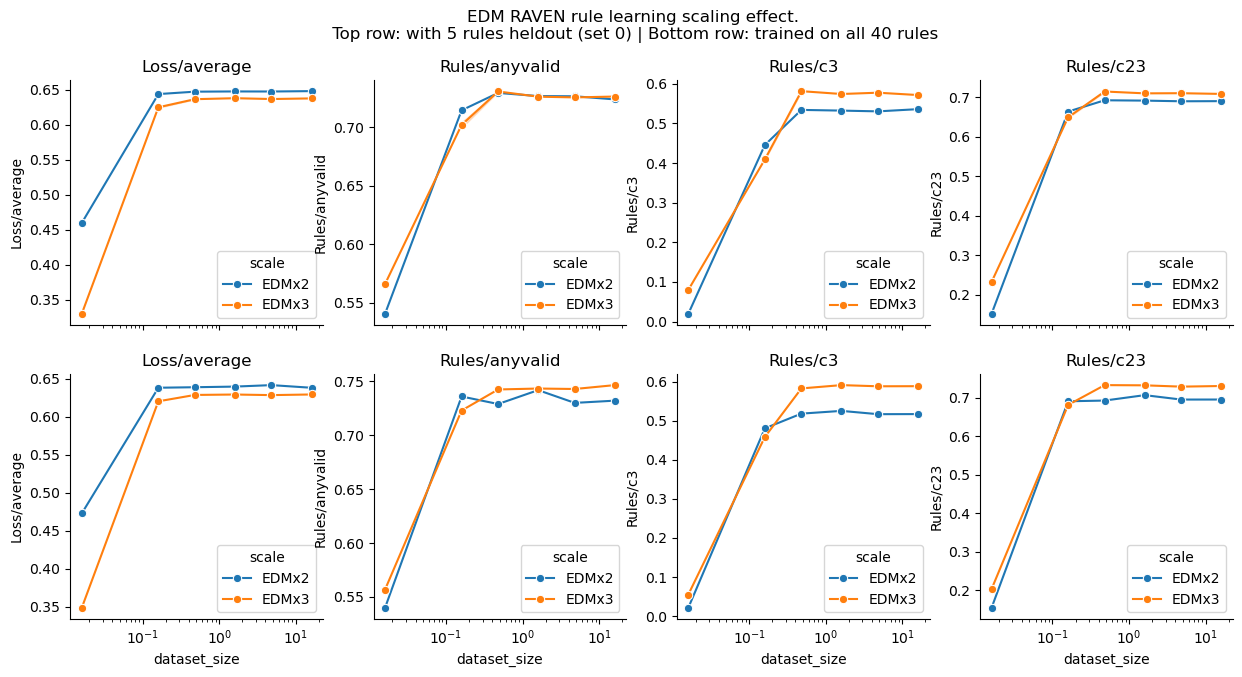

In [83]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharex=True)
for ax, metric in zip(axs[0,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_EDM_sorted[syndf_EDM_sorted.heldout==True], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==True], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["EDMx2", "EDMx3"])
    ax.set_title(metric)
    ax.set_xscale('log')
for ax, metric in zip(axs[1,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_EDM_sorted[syndf_EDM_sorted.heldout==False], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==False], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["EDMx2", "EDMx3"])
    ax.set_title(metric)
    ax.set_xscale('log')
plt.suptitle("EDM RAVEN rule learning scaling effect.\n Top row: with 5 rules heldout (set 0) | Bottom row: trained on all 40 rules")
# saveallforms(synopsisdir, "EDM_raven_rule_learning_scaling_effect", fig)
plt.show()

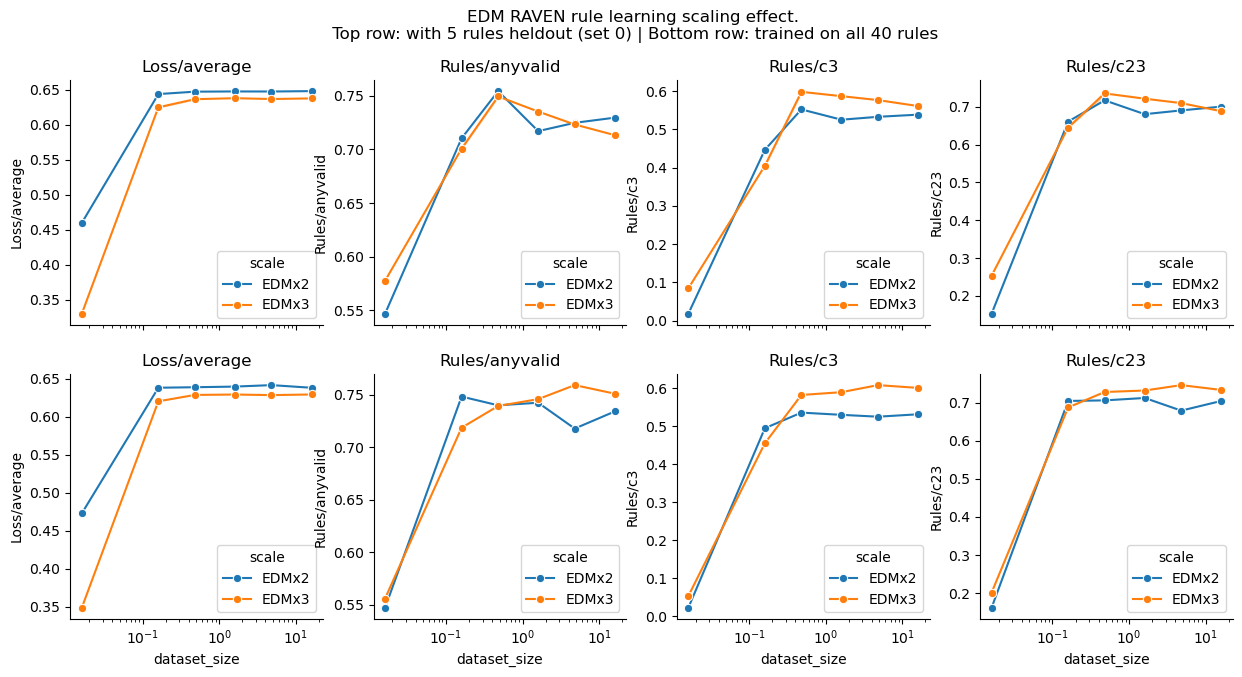

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharex=True)
for ax, metric in zip(axs[0,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_EDM_sorted[syndf_EDM_sorted.heldout==True], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==True], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["EDMx2", "EDMx3"])
    ax.set_title(metric)
    ax.set_xscale('log')
for ax, metric in zip(axs[1,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_EDM_sorted[syndf_EDM_sorted.heldout==False], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==False], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["EDMx2", "EDMx3"])
    ax.set_title(metric)
    ax.set_xscale('log')
plt.suptitle("EDM RAVEN rule learning scaling effect.\n Top row: with 5 rules heldout (set 0) | Bottom row: trained on all 40 rules")
saveallforms(synopsisdir, "EDM_raven_rule_learning_scaling_effect", fig)
plt.show()

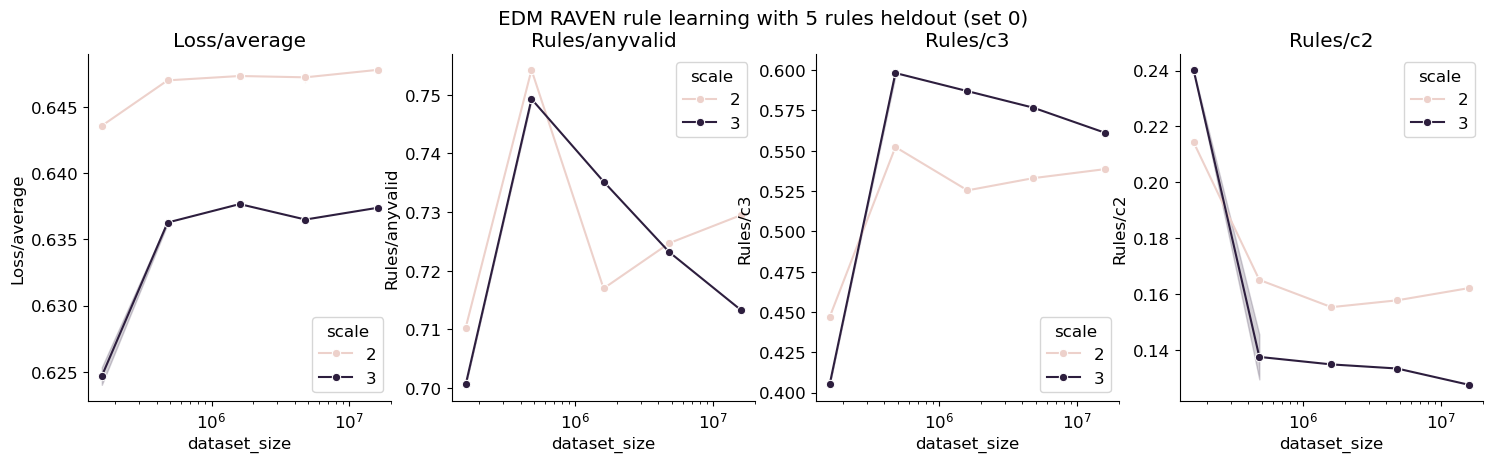

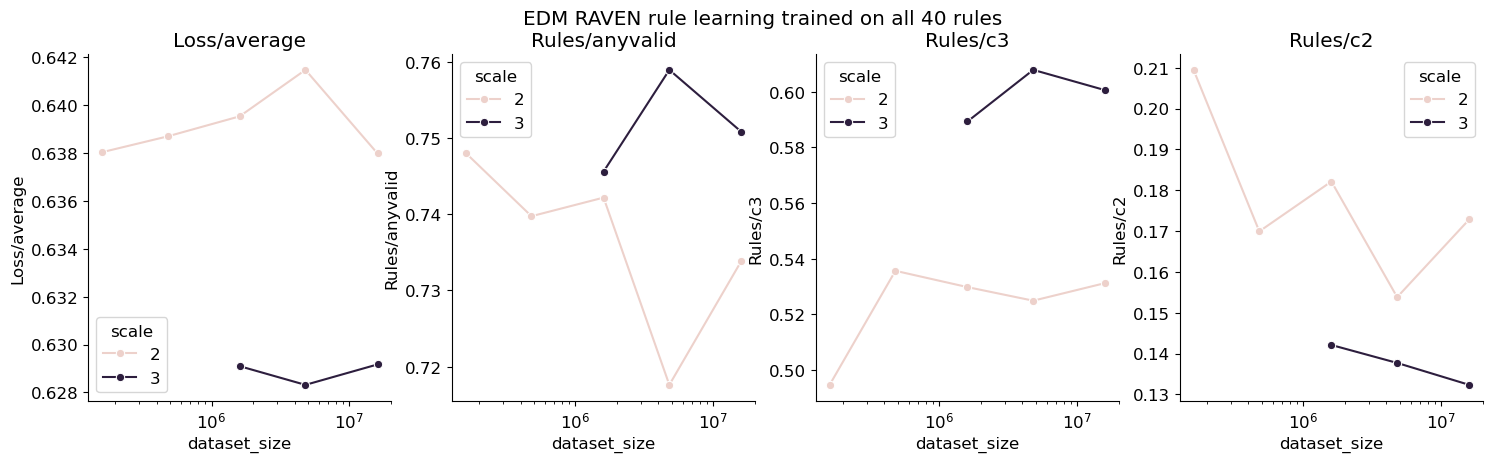

In [58]:
figh, axs = plt.subplots(1, 4, figsize=(18, 4.5), sharex=True, squeeze=False)
for ax, metric in zip(axs[0, :], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==True], x="dataset_size", y=metric, 
                    hue="scale", ax=ax, marker='o', )
    ax.set_title(metric)
    plt.xscale('log')
plt.suptitle("EDM RAVEN rule learning with 5 rules heldout (set 0)")
plt.show()

figh, axs = plt.subplots(1, 4, figsize=(18, 4.5), sharex=True, squeeze=False)
for ax, metric in zip(axs[0, :], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c2",]):
    sns.lineplot(data=syndf_EDM[syndf_EDM.heldout==False], x="dataset_size", y=metric, 
                    hue="scale", ax=ax, marker='o', )
    ax.set_title(metric)
    plt.xscale('log')
plt.suptitle("EDM RAVEN rule learning trained on all 40 rules")
plt.show()

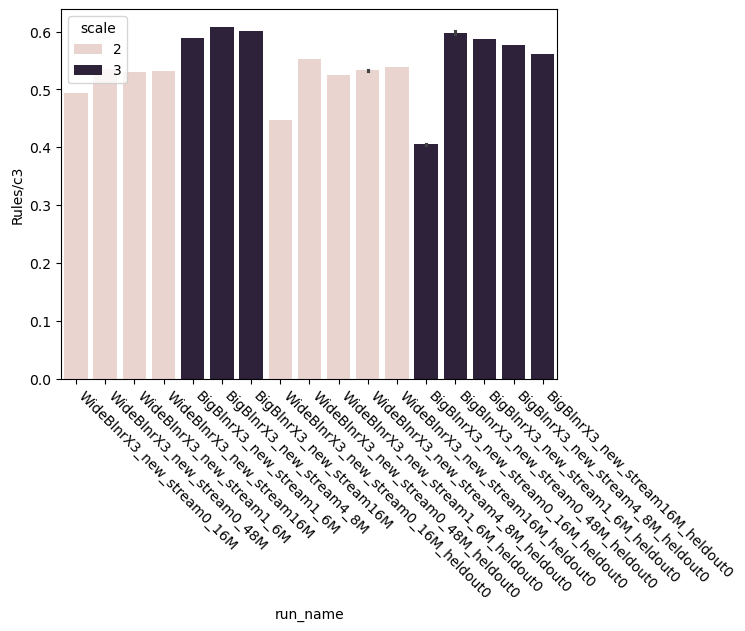

In [68]:
syndf_EDM_sorted = syndf_EDM.sort_values(by=["heldout", "scale", "dataset_size", ], ascending=[True, True, True])
sns.barplot(data=syndf_EDM_sorted, x="run_name", y="Rules/c3", hue="scale")
plt.xticks(rotation=-45, ha='left')
plt.show()

### General learning dynamics

In [15]:
syndf_EDM

,Learning Rate,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,full_name,step,step/epoch,heldout,scale,dataset_size
run_name,,,,,,,,,,,,,,,
WideBlnrX3_new_stream0_16M_heldout0,0.0002,0.643560,0.593999,0.710286,4364.0,0.214355,439.0,0.446777,915.0,WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,999999,True,2,160000.0
WideBlnrX3_new_stream0_48M,0.0002,0.638694,0.590333,0.739746,4545.0,0.169922,348.0,0.535645,1097.0,WideBlnrX3_new_stream0_48M_RAVEN10_abstract_20240705-1908/tensorboard_logs,999999,999999,False,2,480000.0
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636146,0.614749,0.749023,4602.0,0.129395,265.0,0.600098,1229.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240708-2314/tensorboard_logs,999999,999999,True,3,480000.0
BigBlnrX3_new_stream0_48M_heldout0,0.0002,0.636382,0.616904,0.749512,4605.0,0.145508,298.0,0.596191,1221.0,BigBlnrX3_new_stream0_48M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs,999999,999999,True,3,480000.0
BigBlnrX3_new_stream1_6M,0.0002,0.629097,0.633882,0.745605,4581.0,0.142090,291.0,0.589355,1207.0,BigBlnrX3_new_stream1_6M_RAVEN10_abstract_20240705-1903/tensorboard_logs,999999,999999,False,3,1600000.0
BigBlnrX3_new_stream16M,0.0002,0.629170,0.621290,0.750814,4613.0,0.132324,271.0,0.600586,1230.0,BigBlnrX3_new_stream16M_RAVEN10_abstract_20240705-0237/tensorboard_logs,999999,999999,False,3,16000000.0
WideBlnrX3_new_stream4_8M_heldout0,0.0002,0.647637,0.634478,0.725098,4455.0,0.157227,322.0,0.533691,1093.0,WideBlnrX3_new_stream4_8M_heldout0_RAVEN10_abstract_20240708-2207/tensorboard_logs,999999,999999,True,2,4800000.0
WideBlnrX3_new_stream16M_heldout0,0.0002,0.647776,0.636138,0.729492,4482.0,0.162109,332.0,0.538574,1103.0,WideBlnrX3_new_stream16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs,999999,999999,True,2,16000000.0
WideBlnrX3_new_stream0_16M,0.0002,0.638031,0.592863,0.748047,4596.0,0.209473,429.0,0.494629,1013.0,WideBlnrX3_new_stream0_16M_RAVEN10_abstract_20240705-1908/tensorboard_logs,999999,999999,False,2,160000.0


In [62]:
tb_record.tag.unique()

array(['Loss/average', 'Loss/batch', 'Learning Rate', 'Rules/c3_cnt',
       'Rules/c2_cnt', 'Rules/anyvalid_cnt', 'Rules/c3', 'Rules/c2',
       'Rules/anyvalid'], dtype=object)

In [63]:
for expfullname in syndf_EDM.full_name:
    tb_record = tb_data_col_EDM[expfullname]
    expname = expfullname.split("/")[0]
    print(expfullname)
    # print(tb_record.keys())
    # print(tb_record['tag'].unique())    
    tb_anyvalid = tb_record[tb_record.tag=='Val/AnyValid']
    tb_anyvalid["anyvalid_renorm"] = (tb_anyvalid["value"] - 2/3) * 3
    figh = plt.figure(figsize=(6, 5))
    sns.lineplot(data=tb_anyvalid, x='step', y='anyvalid_renorm', label='AnyValid')
    sns.lineplot(data=tb_record[tb_record.tag=='Val/C3'], x='step', y='value', label='C3')
    # sns.lineplot(data=tb_record[tb_record.tag=='Val/AnyValid'], x='step', y='value', label='AnyValid')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/anyvalid'], x='step', y='value', label='AnyValid_abinit')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/c3'], x='step', y='value', label='C3_abinit')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/c2'], x='step', y='value', label='C2_abinit')
    plt.legend() # ['Val/C3', 'Val/C3_abinit', 'Val/C2_abinit', 'Val/AnyValid_abinit']
    plt.title(expname)
    saveallforms(EDMfigdir, f"{expname}_valid_consist_summary", figh)
    plt.show()
    # raise ValueError

### Individual rule learning dynamics

In [26]:
epoch_list, rule_list_all, consistency_all = extract_rule_list_from_eval_col_Diffusion(eval_col, )
rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all, consistency_all)
eval_sample_num = rule_list_all.shape[1]


diffusion model, just fetch ab init generation
(401, 2048, 3) (401, 2, 2048)


In [ ]:
for expfullname in syndf_EDM.full_name:
    tb_record = tb_data_col_EDM[expfullname]
    expname = expfullname.split("/tensorboard_logs")[0]
    prefix = "sample_rule_eval_" #"eval_step" if "stream" in expname else "eval_epoch"
    eval_col = sweep_collect_eval_data(expname, EDM_exproot, prefix=prefix)
    epoch_list, rule_list_all, consistency_all = extract_rule_list_from_eval_col_Diffusion(eval_col, )
    rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all, consistency_all)
    eval_sample_num = rule_list_all.shape[1]
    print(expname)
    if "heldout0" in expname:
        heldout_id = [1, 16, 20, 34, 37]  
    else:
        heldout_id = []

    figh, axs = visualize_indiv_rule_dynam(epoch_list, rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                            titlestr=f"{expname}\nValid rule count separated by rule type")
    saveallforms(EDMfigdir, f"{expname}_indiv_rule_validity", figh)

    figh, axs = visualize_indiv_rule_dynam(epoch_list, cons3_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                        titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", )
    figh, axs = visualize_indiv_rule_dynam(epoch_list, cons2_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                        titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", axs=axs)
    saveallforms(EDMfigdir, f"{expname}_indiv_rule_consistency", figh)
    
    figh = visualize_train_heldout_rule(epoch_list, rule_cnt_mat, heldout_id, 
                                normalizer=eval_sample_num * 3, reflevel=1 / 40,
                                titlestr=f"{expname}\nValid rule fraction")
    saveallforms(EDMfigdir, f"{expname}_train_held_rule_validity", figh)

    figh = visualize_train_heldout_rule(epoch_list, cons3_rule_cnt_mat, heldout_id, 
                                normalizer=eval_sample_num, reflevel=1 / 40,
                                titlestr=f"{expname}\nC3 sample fraction")
    saveallforms(EDMfigdir, f"{expname}_train_held_rule_consistency", figh)

Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps/WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/samples
example file: tensor_557500.pt


  0%|          | 0/401 [00:00<?, ?it/s]

TypeError: extract_rule_list_from_eval_col_Diffusion() got an unexpected keyword argument 'is_abinit'

## DiT

In [17]:
tb_data_col_DiT = extract_all_runs(DiT_exproot)

Extracted data from 096-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_20240711-0205/tensorboard_logs
Extracted data from 091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205/tensorboard_logs
Extracted data from 085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204/tensorboard_logs
Extracted data from 099-RAVEN10_abstract-uncond-DiT_B_1-stream0_016M_20240816-0053/tensorboard_logs
Extracted data from 087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204/tensorboard_logs
Extracted data from 090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs
Extracted data from 095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_heldout0_20240711-0205/tensorboard_logs
Extracted data from 086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204/tensorboard_logs
Extracted data from 092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205/tensorboard_logs
Extracted data from 089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204/tensorbo

In [19]:
for key in sorted(tb_data_col_DiT.keys()):
    print(key)
    if tb_data_col_DiT[key]["step"].max() < 999999:
        print(tb_data_col_DiT[key]["step"].max(), "steps, unfinished run")

085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204/tensorboard_logs
086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204/tensorboard_logs
087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204/tensorboard_logs
088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204/tensorboard_logs
089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204/tensorboard_logs
090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs
091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205/tensorboard_logs
092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205/tensorboard_logs
093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205/tensorboard_logs
094-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_heldout0_20240711-0205/tensorboard_logs
095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_heldout0_20240711-0205/tensorboard_logs
096-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_20240711-0205/tensorboard_logs
097-RAVEN1

In [22]:
simplify_runname = lambda x: x.replace("/tensorboard_logs", "").split("_2024")[0].replace("RAVEN10_abstract-", "")
syndf_DiT = extract_last_step_summary(tb_data_col_DiT, simplify_runname, ())
# sort index
syndf_DiT = syndf_DiT.sort_index()
syndf_DiT

tag,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,step,step/epoch
run_name,,,,,,,,,,,,
085-uncond-DiT_S_1-stream0_16M,0.094453,0.089580,0.737956,4534.0,0.111816,229.0,0.595703,1220.0,18.965296,085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204/tensorboard_logs,1000000,1000000
086-uncond-DiT_S_1-stream1_6M,0.094237,0.098248,0.792806,4871.0,0.117676,241.0,0.650391,1332.0,18.855453,086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204/tensorboard_logs,1000000,1000000
087-uncond-DiT_S_1-stream16M,0.094620,0.098189,0.780762,4797.0,0.122559,251.0,0.633789,1298.0,16.748566,087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204/tensorboard_logs,1000000,1000000
088-uncond-DiT_S_1-stream16M_heldout0,0.095244,0.096979,0.778483,4783.0,0.120117,246.0,0.636230,1303.0,19.278015,088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204/tensorboard_logs,1000000,1000000
089-uncond-DiT_S_1-stream1_6M_heldout0,0.096174,0.095929,0.765462,4703.0,0.125977,258.0,0.608398,1246.0,19.268356,089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204/tensorboard_logs,1000000,1000000
090-uncond-DiT_S_1-stream0_16M_heldout0,0.095534,0.094757,0.734701,4514.0,0.142090,291.0,0.571289,1170.0,18.949669,090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs,1000000,1000000
091-uncond-DiT_B_1-stream16M,0.093849,0.094762,0.754069,4633.0,0.125000,256.0,0.603027,1235.0,8.272856,091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205/tensorboard_logs,1000000,1000000
092-uncond-DiT_B_1-stream1_6M,0.094446,0.092289,0.771810,4742.0,0.107422,220.0,0.643066,1317.0,8.720461,092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205/tensorboard_logs,1000000,1000000
093-uncond-DiT_B_1-stream1_6M_heldout0,0.095623,0.098117,0.798991,4909.0,0.138672,284.0,0.651855,1335.0,8.789845,093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205/tensorboard_logs,1000000,1000000


In [23]:
syndf_DiT.to_csv(join(tabdir, "DiT_raven_tensorboard_data.csv"))
pkl.dump(tb_data_col_DiT, open(join(tabdir, "DiT_raven_tensorboard_raw_data.pkl"), "wb"))

In [90]:
excluded_runs = [  ]
simplify_runname = lambda x: x.replace("/tensorboard_logs", "").split("_2024")[0].replace("RAVEN10_abstract-", "")
syndf_DiT_std = extract_last_K_step_avg_summary(tb_data_col_DiT, simplify_runname, exclude_runs=excluded_runs, K=10, compute_std=True)
syndf_DiT_std = syndf_DiT_std.sort_index()
syndf_DiT_std.to_csv(join(tabdir, "DiT_raven_tensorboard_data_last10.csv"))
syndf_DiT_std

,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,...,step/epoch,Loss/average_std,Loss/batch_std,Rules/anyvalid_std,Rules/anyvalid_cnt_std,Rules/c2_std,Rules/c2_cnt_std,Rules/c3_std,Rules/c3_cnt_std,Speed/steps_per_sec_std
run_name,,,,,,,,,,,,,,,,,,,,,
085-uncond-DiT_S_1-stream0_16M,0.094250,0.093119,0.753874,4631.8,0.122949,251.8,0.602930,1234.8,18.911798,085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204/tensorboard_logs,...,977500,0.000787,0.007092,0.023433,143.975152,0.010715,21.943361,0.026732,54.747501,0.520298
086-uncond-DiT_S_1-stream1_6M,0.094534,0.094586,0.767692,4716.7,0.135107,276.7,0.613086,1255.6,19.068166,086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204/tensorboard_logs,...,977500,0.000738,0.005965,0.027885,171.326232,0.011065,22.662009,0.038581,79.013642,0.074948
087-uncond-DiT_S_1-stream16M,0.094520,0.095650,0.782910,4810.2,0.130811,267.9,0.631982,1294.3,18.946301,087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204/tensorboard_logs,...,977500,0.000667,0.004046,0.015262,93.768983,0.008754,17.928562,0.015125,30.976873,0.775090
088-uncond-DiT_S_1-stream16M_heldout0,0.095964,0.096755,0.768522,4721.8,0.125732,257.5,0.619727,1269.2,19.285516,088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204/tensorboard_logs,...,977500,0.000607,0.005439,0.026068,160.160891,0.009619,19.699126,0.034727,71.120867,0.004874
089-uncond-DiT_S_1-stream1_6M_heldout0,0.096124,0.097144,0.759196,4664.5,0.135449,277.4,0.602393,1233.7,19.265524,089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204/tensorboard_logs,...,977500,0.000591,0.005565,0.016120,99.041237,0.010711,21.935258,0.020437,41.854377,0.018285
090-uncond-DiT_S_1-stream0_16M_heldout0,0.095820,0.097285,0.747510,4592.7,0.134717,275.9,0.585352,1198.8,18.690334,090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs,...,977500,0.000667,0.003614,0.014643,89.964252,0.004820,9.870832,0.017124,35.070722,0.676310
091-uncond-DiT_B_1-stream16M,0.094528,0.095505,0.789095,4848.2,0.122607,251.1,0.646924,1324.9,8.740444,091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205/tensorboard_logs,...,977500,0.000750,0.003961,0.023185,142.451395,0.008760,17.940953,0.031696,64.912676,0.164379
092-uncond-DiT_B_1-stream1_6M,0.094594,0.092389,0.777067,4774.3,0.121289,248.4,0.638916,1308.5,8.753056,092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205/tensorboard_logs,...,977500,0.000568,0.004284,0.018436,113.268658,0.012075,24.730548,0.025911,53.066520,0.014044
093-uncond-DiT_B_1-stream1_6M_heldout0,0.095826,0.096923,0.783219,4812.1,0.128613,263.4,0.638379,1307.4,8.790528,093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205/tensorboard_logs,...,977500,0.000649,0.005122,0.024339,149.541856,0.010031,20.543720,0.033947,69.524097,0.004066


### Overall scaling curve

In [91]:
syndf_DiT = pd.read_csv(join(tabdir, "DiT_raven_tensorboard_data_last10.csv"), index_col=0)
tb_data_col_DiT = pkl.load(open(join(tabdir, "DiT_raven_tensorboard_raw_data.pkl"), "rb"))

In [92]:
syndf_DiT["dataset_size"] = syndf_DiT.index.map(extract_and_convert)
syndf_DiT["heldout"] = syndf_DiT.index.map(lambda x: "_heldout0" in x)
syndf_DiT["scale"] = syndf_DiT.index.map(lambda x: "DiT_B_1" if "DiT_B_1" in x else "DiT_S_1" if "DiT_S_1" in x else None)
syndf_DiT["Rules/c23"] = syndf_DiT["Rules/c2"] + syndf_DiT["Rules/c3"]
syndf_DiT["Rules/c23_cnt"] = syndf_DiT["Rules/c2_cnt"] + syndf_DiT["Rules/c3_cnt"]

In [93]:
syndf_DiT

,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,...,Rules/c2_std,Rules/c2_cnt_std,Rules/c3_std,Rules/c3_cnt_std,Speed/steps_per_sec_std,dataset_size,heldout,scale,Rules/c23,Rules/c23_cnt
run_name,,,,,,,,,,,,,,,,,,,,,
085-uncond-DiT_S_1-stream0_16M,0.094250,0.093119,0.753874,4631.8,0.122949,251.8,0.602930,1234.8,18.911798,085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204/tensorboard_logs,...,0.010715,21.943361,0.026732,54.747501,0.520298,0.160,False,DiT_S_1,0.725879,1486.6
086-uncond-DiT_S_1-stream1_6M,0.094534,0.094586,0.767692,4716.7,0.135107,276.7,0.613086,1255.6,19.068166,086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204/tensorboard_logs,...,0.011065,22.662009,0.038581,79.013642,0.074948,1.600,False,DiT_S_1,0.748193,1532.3
087-uncond-DiT_S_1-stream16M,0.094520,0.095650,0.782910,4810.2,0.130811,267.9,0.631982,1294.3,18.946301,087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204/tensorboard_logs,...,0.008754,17.928562,0.015125,30.976873,0.775090,16.000,False,DiT_S_1,0.762793,1562.2
088-uncond-DiT_S_1-stream16M_heldout0,0.095964,0.096755,0.768522,4721.8,0.125732,257.5,0.619727,1269.2,19.285516,088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204/tensorboard_logs,...,0.009619,19.699126,0.034727,71.120867,0.004874,16.000,True,DiT_S_1,0.745459,1526.7
089-uncond-DiT_S_1-stream1_6M_heldout0,0.096124,0.097144,0.759196,4664.5,0.135449,277.4,0.602393,1233.7,19.265524,089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204/tensorboard_logs,...,0.010711,21.935258,0.020437,41.854377,0.018285,1.600,True,DiT_S_1,0.737842,1511.1
090-uncond-DiT_S_1-stream0_16M_heldout0,0.095820,0.097285,0.747510,4592.7,0.134717,275.9,0.585352,1198.8,18.690334,090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs,...,0.004820,9.870832,0.017124,35.070722,0.676310,0.160,True,DiT_S_1,0.720068,1474.7
091-uncond-DiT_B_1-stream16M,0.094528,0.095505,0.789095,4848.2,0.122607,251.1,0.646924,1324.9,8.740444,091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205/tensorboard_logs,...,0.008760,17.940953,0.031696,64.912676,0.164379,16.000,False,DiT_B_1,0.769531,1576.0
092-uncond-DiT_B_1-stream1_6M,0.094594,0.092389,0.777067,4774.3,0.121289,248.4,0.638916,1308.5,8.753056,092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205/tensorboard_logs,...,0.012075,24.730548,0.025911,53.066520,0.014044,1.600,False,DiT_B_1,0.760205,1556.9
093-uncond-DiT_B_1-stream1_6M_heldout0,0.095826,0.096923,0.783219,4812.1,0.128613,263.4,0.638379,1307.4,8.790528,093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205/tensorboard_logs,...,0.010031,20.543720,0.033947,69.524097,0.004066,1.600,True,DiT_B_1,0.766992,1570.8


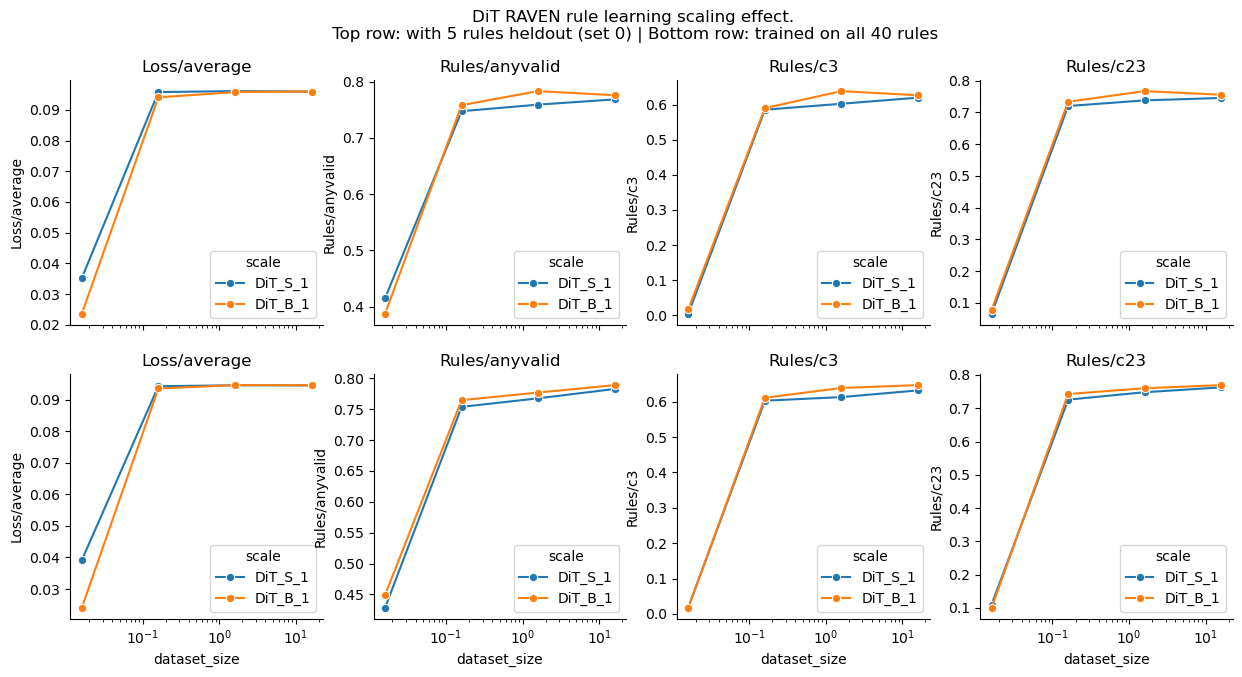

In [94]:
syndf_DiT_sorted = syndf_DiT.sort_values(by=["heldout", "scale", "dataset_size", ], ascending=[True, False, True, ])
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharex=True)
for ax, metric in zip(axs[0,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_DiT_sorted[syndf_DiT_sorted.heldout==True], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_DiT[syndf_DiT.heldout==True], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["DiT_S_1", "DiT_B_1"])
    ax.set_title(metric)
    ax.set_xscale('log')
for ax, metric in zip(axs[1,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_DiT_sorted[syndf_DiT_sorted.heldout==False], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_DiT[syndf_DiT.heldout==False], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["DiT_S_1", "DiT_B_1"])
    ax.set_title(metric)
    ax.set_xscale('log')
plt.suptitle("DiT RAVEN rule learning scaling effect.\n Top row: with 5 rules heldout (set 0) | Bottom row: trained on all 40 rules")
saveallforms(synopsisdir, "DiT_raven_rule_learning_scaling_effect", fig)
plt.show()

### General Learning Dynamics

In [ ]:
for expfullname in syndf_DiT.full_name:
    tb_record = tb_data_col_DiT[expfullname]
    expname = expfullname.split("/")[0]
    print(expfullname)
    # print(tb_record.keys())
    # print(tb_record['tag'].unique())    
    tb_anyvalid = tb_record[tb_record.tag=='Val/AnyValid']
    tb_anyvalid["anyvalid_renorm"] = (tb_anyvalid["value"] - 2/3) * 3
    figh = plt.figure(figsize=(6, 5))
    sns.lineplot(data=tb_anyvalid, x='step', y='anyvalid_renorm', label='AnyValid')
    sns.lineplot(data=tb_record[tb_record.tag=='Val/C3'], x='step', y='value', label='C3')
    # sns.lineplot(data=tb_record[tb_record.tag=='Val/AnyValid'], x='step', y='value', label='AnyValid')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/anyvalid'], x='step', y='value', label='AnyValid_abinit')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/c3'], x='step', y='value', label='C3_abinit')
    sns.lineplot(data=tb_record[tb_record.tag=='Rules/c2'], x='step', y='value', label='C2_abinit')
    plt.legend() # ['Val/C3', 'Val/C3_abinit', 'Val/C2_abinit', 'Val/AnyValid_abinit']
    plt.title(expname)
    saveallforms(DiTfigdir, f"{expname}_valid_consist_summary", figh)
    plt.show()
    # raise ValueError

### Load individual epochs and plot rule learning dynamics 

In [ ]:
for expfullname in syndf_DiT.full_name:
    tb_record = tb_data_col_DiT[expfullname]
    expname = expfullname.split("/tensorboard_logs")[0]
    prefix = "sample_rule_eval_" #"eval_step" if "stream" in expname else "eval_epoch"
    eval_col = sweep_collect_eval_data(expname, DiT_exproot, prefix=prefix)
    epoch_list, rule_list_all, consistency_all = extract_rule_list_from_eval_col_Diffusion(eval_col, )
    rule_cnt_mat, cons3_rule_cnt_mat, cons2_rule_cnt_mat = format_rule_list_to_mat(rule_list_all, consistency_all)
    eval_sample_num = rule_list_all.shape[1]
    print(expname)
    if "heldout0" in expname:
        heldout_id = [1, 16, 20, 34, 37]  
    else:
        heldout_id = []

    figh, axs = visualize_indiv_rule_dynam(epoch_list, rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                            titlestr=f"{expname}\nValid rule count separated by rule type")
    saveallforms(DiTfigdir, f"{expname}_indiv_rule_validity", figh)

    figh, axs = visualize_indiv_rule_dynam(epoch_list, cons3_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                        titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", )
    figh, axs = visualize_indiv_rule_dynam(epoch_list, cons2_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                        titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", axs=axs)
    saveallforms(DiTfigdir, f"{expname}_indiv_rule_consistency", figh)
    
    figh = visualize_train_heldout_rule(epoch_list, rule_cnt_mat, heldout_id, 
                                normalizer=eval_sample_num * 3, reflevel=1 / 40,
                                titlestr=f"{expname}\nValid rule fraction")
    saveallforms(DiTfigdir, f"{expname}_train_held_rule_validity", figh)

    figh = visualize_train_heldout_rule(epoch_list, cons3_rule_cnt_mat, heldout_id, 
                                normalizer=eval_sample_num, reflevel=1 / 40,
                                titlestr=f"{expname}\nC3 sample fraction")
    saveallforms(DiTfigdir, f"{expname}_train_held_rule_consistency", figh)

In [107]:
import torch
for expname in [
    "094-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_heldout0_20240711-0205", 
    "093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205", 
    "095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_heldout0_20240711-0205", 
    "090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204", 
    "089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204", 
    "088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204", 
    "085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204", 
    "086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204", 
    # "083-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0149", 
    "087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204", 
    "096-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_20240711-0205", 
    "092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205", 
    # "084-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0200", 
    "091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205", ]:
    assert os.path.exists(join(DiT_exproot, expname, "tensorboard_logs")), expname  
    # for files with names like 'sample_rule_eval_995000.pt' find the one with largest number
    epoch_num = max([int(f.split("sample_rule_eval_")[-1].split(".pt")[0]) for f in os.listdir(join(DiT_exproot, expname,'samples'))])
    print(epoch_num)
    samples_eval = torch.load(join(DiT_exproot, expname, 'samples', f"sample_rule_eval_{epoch_num}.pt"))

1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000


In [133]:
# for expname in [
#     "094-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_heldout0_20240711-0205", 
#     "093-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_heldout0_20240711-0205", 
#     "095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_heldout0_20240711-0205", 
#     "090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204", 
#     "089-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_heldout0_20240711-0204", 
#     "088-RAVEN10_abstract-uncond-DiT_S_1-stream16M_heldout0_20240711-0204", 
#     "085-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_20240711-0204", 
#     "086-RAVEN10_abstract-uncond-DiT_S_1-stream1_6M_20240711-0204", 
#     # "083-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0149", 
#     "087-RAVEN10_abstract-uncond-DiT_S_1-stream16M_20240711-0204", 
#     "096-RAVEN10_abstract-uncond-DiT_B_1-stream0_16M_20240711-0205", 
#     "092-RAVEN10_abstract-uncond-DiT_B_1-stream1_6M_20240711-0205", 
#     # "084-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0200", 
#     "091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205", ]:
expname = "091-RAVEN10_abstract-uncond-DiT_B_1-stream16M_20240711-0205"
expname = "095-RAVEN10_abstract-uncond-DiT_B_1-stream16M_heldout0_20240711-0205"
assert os.path.exists(join(DiT_exproot, expname, "tensorboard_logs")), expname  
# for files with names like 'sample_rule_eval_995000.pt' find the one with largest number
epoch_nums = sorted([int(f.split("sample_rule_eval_")[-1].split(".pt")[0]) for f in os.listdir(join(DiT_exproot, expname,'samples'))])
eval_col = {}
for epoch_num in tqdm(epoch_nums):
    samples_eval = torch.load(join(DiT_exproot, expname, 'samples', f"sample_rule_eval_{epoch_num}.pt"))
    eval_col[epoch_num] = samples_eval

1000000


100%|██████████| 802/802 [00:39<00:00, 20.22it/s]


In [116]:
list(eval_col[1])

['c3_list', 'c2_list', 'rule_col', 'c3_cnt', 'c2_cnt', 'anyvalid_cnt', 'total']

In [141]:
epoch_list = list(eval_col.keys())
rule_list_all = []
consistency_all = []
for epoch in eval_col.keys():
    rule_list_all.append(eval_col[epoch]["rule_col"])
    consistency_all.append((eval_col[epoch]["c3_list"], eval_col[epoch]["c2_list"]))
rule_list_all = np.array(rule_list_all, dtype=object)
consistency_all = np.array(consistency_all, dtype=object)
print(rule_list_all.shape, consistency_all.shape)


(401, 2048, 3) (401, 2, 2048)


In [ ]:
# each element in the rule rule_pool_all is a list of rules for all the samples in the corresponding generation
rule_pool_all = []
for i in trange(len(epoch_list)):
    rule_pool = np.concatenate(list(rule_list_all[i,:,:].flatten())).astype(int)
    rule_pool_all.append(rule_pool)
# plot the number of rules == rule_i for each generation
rule_cnt_mat = np.zeros((len(epoch_list), 40))
for i in trange(len(epoch_list)):
    rule_pool = rule_pool_all[i]
    rule_uniq, counts = np.unique(rule_pool, return_counts=True)
    rule_cnt_mat[i, rule_uniq] = counts

cons3_rule_pool_all = []
cons2_rule_pool_all = []
for i in trange(len(epoch_list)):
    rule_pool = np.concatenate(list(consistency_all[i,0,:].flatten())).astype(int)
    cons3_rule_pool_all.append(rule_pool)
    rule_pool = np.concatenate(list(consistency_all[i,1,:].flatten())).astype(int)
    cons2_rule_pool_all.append(rule_pool)

cons3_rule_cnt_mat = np.zeros((len(epoch_list), 40))
cons2_rule_cnt_mat = np.zeros((len(epoch_list), 40))
for i in trange(len(epoch_list)):
    rule_pool = cons3_rule_pool_all[i]
    rule_uniq, counts = np.unique(rule_pool, return_counts=True)
    cons3_rule_cnt_mat[i, rule_uniq] = counts
    rule_pool = cons2_rule_pool_all[i]
    rule_uniq, counts = np.unique(rule_pool, return_counts=True)
    cons2_rule_cnt_mat[i, rule_uniq] = counts
    
if "heldout0" in expname:
    heldout_id = [1, 16, 20, 34, 37]  
else:
    heldout_id = []
figdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Figures_newrule"
figh, axs = visualize_indiv_rule_dynam(epoch_list, rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                        titlestr=f"{expname}\nValid rule count separated by rule type")
saveallforms(figdir, f"{expname}_indiv_rule_validity", figh)


figh, axs = visualize_indiv_rule_dynam(epoch_list, cons3_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                       titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", )
figh, axs = visualize_indiv_rule_dynam(epoch_list, cons2_rule_cnt_mat, conv_wid=10, heldout_id=heldout_id,
                                       titlestr=f"{expname}\nConsistency 3 (blue) and 2 (orange) rule count", axs=axs)
saveallforms(figdir, f"{expname}_indiv_rule_consistency", figh)


In [111]:
len([int(f.split("sample_rule_eval_")[-1].split(".pt")[0]) for f in os.listdir(join(DiT_exproot, expname,'samples'))])

802

## SiT

In [39]:
tb_data_col_SiT = extract_all_runs(SiT_exproot)

Extracted data from 017-SiT_B_1-stream0_16M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs
Extracted data from 013-SiT_S_1-stream0_016M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 006-SiT_S_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs
Extracted data from 018-SiT_B_1-stream1_6M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 012-SiT_B_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs
Extracted data from 007-SiT_S_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs
Extracted data from 010-SiT_S_1-stream16M_all-Linear-velocity-None/tensorboard_logs
Extracted data from 016-SiT_B_1-stream16M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 015-SiT_B_1-stream0_016M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 014-SiT_S_1-stream0_16M_heldout0-Linear-velocity-None/tensorboard_logs
Extracted data from 008

In [51]:
for key in sorted(tb_data_col_SiT.keys()):
    if tb_data_col_SiT[key]["step"].max() < 999999:
        print(key)
        print(tb_data_col_SiT[key]["step"].max(), "steps, unfinished run")

004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs
875000 steps, unfinished run
005-SiT_B_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs
875000 steps, unfinished run
011-SiT_B_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs
942500 steps, unfinished run
012-SiT_B_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs
815200 steps, unfinished run
013-SiT_B_1-stream16M_all-Linear-velocity-None/tensorboard_logs
979500 steps, unfinished run
014-SiT_B_1-stream1_6M_all-Linear-velocity-None/tensorboard_logs
975000 steps, unfinished run


In [48]:
runnames = list(k[4:].replace("-Linear-velocity-None/tensorboard_logs","") for k in tb_data_col_SiT.keys() if "pilot" not in k)

In [53]:
excluded_runs = [
    "004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs",
    "005-SiT_B_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs",
]
simplify_runname = lambda x: x.replace("/tensorboard_logs", "").split("_2024")[0].replace("RAVEN10_abstract-", "")
syndf_SiT = extract_last_step_summary(tb_data_col_SiT, simplify_runname, excluded_runs)
syndf_SiT = syndf_SiT.sort_index()
syndf_SiT

Excluding 004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs
Excluding 005-SiT_B_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs


tag,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,step,step/epoch
run_name,,,,,,,,,,,,
006-SiT_S_1-stream0_016M_all-Linear-velocity-None,0.513552,0.468938,0.499837,3071.0,0.097168,199.0,0.022949,47.0,16.666367,006-SiT_S_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,1000000,1000000
007-SiT_S_1-stream0_16M_all-Linear-velocity-None,0.792181,0.792535,0.846842,5203.0,0.118652,243.0,0.725098,1485.0,13.036997,007-SiT_S_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,1000000,1000000
008-SiT_S_1-stream1_6M_all-Linear-velocity-None,0.796287,0.785929,0.885417,5440.0,0.114258,234.0,0.775391,1588.0,17.617640,008-SiT_S_1-stream1_6M_all-Linear-velocity-None/tensorboard_logs,1000000,1000000
010-SiT_S_1-stream16M_all-Linear-velocity-None,0.796884,0.830317,0.875488,5379.0,0.109375,224.0,0.763184,1563.0,9.326361,010-SiT_S_1-stream16M_all-Linear-velocity-None/tensorboard_logs,1000000,1000000
011-SiT_B_1-stream0_16M_all-Linear-velocity-None,0.781162,0.752783,0.797852,4902.0,0.154297,316.0,0.629395,1289.0,7.172107,011-SiT_B_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,942500,942500
011-SiT_S_1-stream16M_heldout0-Linear-velocity-None,0.804236,0.827832,0.870117,5346.0,0.110840,227.0,0.757812,1552.0,20.039679,011-SiT_S_1-stream16M_heldout0-Linear-velocity-None/tensorboard_logs,1000000,1000000
012-SiT_B_1-stream0_016M_all-Linear-velocity-None,0.436349,0.419030,0.471517,2897.0,0.088379,181.0,0.058594,120.0,6.997288,012-SiT_B_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,815200,815000
012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None,0.801265,0.809084,0.886393,5446.0,0.124023,254.0,0.770996,1579.0,19.949865,012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None/tensorboard_logs,1000000,1000000
013-SiT_B_1-stream16M_all-Linear-velocity-None,0.794365,0.773824,0.892090,5481.0,0.115723,237.0,0.783691,1605.0,8.927638,013-SiT_B_1-stream16M_all-Linear-velocity-None/tensorboard_logs,979500,977500


In [54]:
syndf_SiT.to_csv(join(tabdir, "SiT_raven_tensorboard_data.csv"))
pkl.dump(tb_data_col_SiT, open(join(tabdir, "SiT_raven_tensorboard_raw_data.pkl"), "wb"))

In [95]:
excluded_runs = [
    "004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs",
    "005-SiT_B_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs",
]
simplify_runname = lambda x: x.replace("/tensorboard_logs", "").split("_2024")[0].replace("RAVEN10_abstract-", "")
syndf_SiT_std = extract_last_K_step_avg_summary(tb_data_col_SiT, simplify_runname, exclude_runs=excluded_runs, K=10, compute_std=True)
syndf_SiT_std = syndf_SiT_std.sort_index()
syndf_SiT_std.to_csv(join(tabdir, "SiT_raven_tensorboard_data_last10.csv"))
syndf_SiT_std

Excluding 004-SiT_S_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs
Excluding 005-SiT_B_1-stream0_16M_pilot-Linear-velocity-None/tensorboard_logs


,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,...,step/epoch,Loss/average_std,Loss/batch_std,Rules/anyvalid_std,Rules/anyvalid_cnt_std,Rules/c2_std,Rules/c2_cnt_std,Rules/c3_std,Rules/c3_cnt_std,Speed/steps_per_sec_std
run_name,,,,,,,,,,,,,,,,,,,,,
006-SiT_S_1-stream0_016M_all-Linear-velocity-None,0.515942,0.506911,0.500635,3075.9,0.097559,199.8,0.016650,34.1,17.081602,006-SiT_S_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,...,977500,0.006074,0.032274,0.007306,44.891103,0.004045,8.283853,0.002897,5.933895,0.737130
007-SiT_S_1-stream0_16M_all-Linear-velocity-None,0.794220,0.773342,0.846305,5199.7,0.120801,247.4,0.722168,1479.0,18.578108,007-SiT_S_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,...,977500,0.003117,0.025224,0.001862,11.441154,0.003470,7.105553,0.004343,8.894443,2.898249
008-SiT_S_1-stream1_6M_all-Linear-velocity-None,0.796578,0.788204,0.883431,5427.8,0.111279,227.9,0.773389,1583.9,19.665982,008-SiT_S_1-stream1_6M_all-Linear-velocity-None/tensorboard_logs,...,977500,0.003032,0.039944,0.001389,8.534896,0.003976,8.143846,0.003657,7.489993,0.719731
010-SiT_S_1-stream16M_all-Linear-velocity-None,0.796583,0.803868,0.876318,5384.1,0.105713,216.5,0.768164,1573.2,18.850724,010-SiT_S_1-stream16M_all-Linear-velocity-None/tensorboard_logs,...,977500,0.002970,0.029069,0.001100,6.756889,0.003867,7.919736,0.002873,5.884065,3.347152
011-SiT_B_1-stream0_16M_all-Linear-velocity-None,0.783876,0.792519,0.802018,4927.6,0.146729,300.5,0.638721,1308.1,8.551745,011-SiT_B_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,...,920000,0.001495,0.028555,0.004117,25.294707,0.005554,11.374924,0.007972,16.326189,0.724661
011-SiT_S_1-stream16M_heldout0-Linear-velocity-None,0.804104,0.799794,0.869320,5341.1,0.113135,231.7,0.753564,1543.3,20.047720,011-SiT_S_1-stream16M_heldout0-Linear-velocity-None/tensorboard_logs,...,977500,0.002334,0.031407,0.001699,10.439774,0.002447,5.012207,0.002059,4.217688,0.010945
012-SiT_B_1-stream0_016M_all-Linear-velocity-None,0.440830,0.439207,0.467822,2874.3,0.088965,182.2,0.054980,112.6,6.765725,012-SiT_B_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,...,792500,0.003345,0.027102,0.006355,39.047123,0.004654,9.531235,0.001915,3.921451,1.684363
012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None,0.804023,0.795016,0.885319,5439.4,0.129004,264.2,0.765576,1567.9,20.024264,012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None/tensorboard_logs,...,977500,0.002747,0.035710,0.001601,9.834181,0.004827,9.886017,0.003909,8.006248,0.026427
013-SiT_B_1-stream16M_all-Linear-velocity-None,0.794016,0.799872,0.892529,5483.7,0.112305,230.0,0.786719,1611.2,8.938667,013-SiT_B_1-stream16M_all-Linear-velocity-None/tensorboard_logs,...,955000,0.004149,0.031400,0.000878,5.396501,0.004020,8.232726,0.003204,6.562520,0.006459


### Overall scaling curve

In [96]:
syndf_SiT = pd.read_csv(join(tabdir, "SiT_raven_tensorboard_data_last10.csv"), index_col=0)
tb_data_col_SiT = pkl.load(open(join(tabdir, "SiT_raven_tensorboard_raw_data.pkl"), "rb"))

In [97]:
syndf_SiT["dataset_size"] = syndf_SiT.index.map(extract_and_convert)
syndf_SiT["heldout"] = syndf_SiT.index.map(lambda x: "_heldout0" in x)
syndf_SiT["scale"] = syndf_SiT.index.map(lambda x: "SiT_B_1" if "SiT_B_1" in x else "SiT_S_1" if "SiT_S_1" in x else None)
syndf_SiT["Rules/c23"] = syndf_SiT["Rules/c2"] + syndf_SiT["Rules/c3"]
syndf_SiT["Rules/c23_cnt"] = syndf_SiT["Rules/c2_cnt"] + syndf_SiT["Rules/c3_cnt"]

In [98]:
syndf_SiT

,Loss/average,Loss/batch,Rules/anyvalid,Rules/anyvalid_cnt,Rules/c2,Rules/c2_cnt,Rules/c3,Rules/c3_cnt,Speed/steps_per_sec,full_name,...,Rules/c2_std,Rules/c2_cnt_std,Rules/c3_std,Rules/c3_cnt_std,Speed/steps_per_sec_std,dataset_size,heldout,scale,Rules/c23,Rules/c23_cnt
run_name,,,,,,,,,,,,,,,,,,,,,
006-SiT_S_1-stream0_016M_all-Linear-velocity-None,0.515942,0.506911,0.500635,3075.9,0.097559,199.8,0.016650,34.1,17.081602,006-SiT_S_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,...,0.004045,8.283853,0.002897,5.933895,0.737130,0.016,False,SiT_S_1,0.114209,233.9
007-SiT_S_1-stream0_16M_all-Linear-velocity-None,0.794220,0.773342,0.846305,5199.7,0.120801,247.4,0.722168,1479.0,18.578108,007-SiT_S_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,...,0.003470,7.105553,0.004343,8.894443,2.898249,0.160,False,SiT_S_1,0.842969,1726.4
008-SiT_S_1-stream1_6M_all-Linear-velocity-None,0.796578,0.788204,0.883431,5427.8,0.111279,227.9,0.773389,1583.9,19.665982,008-SiT_S_1-stream1_6M_all-Linear-velocity-None/tensorboard_logs,...,0.003976,8.143846,0.003657,7.489993,0.719731,1.600,False,SiT_S_1,0.884668,1811.8
010-SiT_S_1-stream16M_all-Linear-velocity-None,0.796583,0.803868,0.876318,5384.1,0.105713,216.5,0.768164,1573.2,18.850724,010-SiT_S_1-stream16M_all-Linear-velocity-None/tensorboard_logs,...,0.003867,7.919736,0.002873,5.884065,3.347152,16.000,False,SiT_S_1,0.873877,1789.7
011-SiT_B_1-stream0_16M_all-Linear-velocity-None,0.783876,0.792519,0.802018,4927.6,0.146729,300.5,0.638721,1308.1,8.551745,011-SiT_B_1-stream0_16M_all-Linear-velocity-None/tensorboard_logs,...,0.005554,11.374924,0.007972,16.326189,0.724661,0.160,False,SiT_B_1,0.785449,1608.6
011-SiT_S_1-stream16M_heldout0-Linear-velocity-None,0.804104,0.799794,0.869320,5341.1,0.113135,231.7,0.753564,1543.3,20.047720,011-SiT_S_1-stream16M_heldout0-Linear-velocity-None/tensorboard_logs,...,0.002447,5.012207,0.002059,4.217688,0.010945,16.000,True,SiT_S_1,0.866699,1775.0
012-SiT_B_1-stream0_016M_all-Linear-velocity-None,0.440830,0.439207,0.467822,2874.3,0.088965,182.2,0.054980,112.6,6.765725,012-SiT_B_1-stream0_016M_all-Linear-velocity-None/tensorboard_logs,...,0.004654,9.531235,0.001915,3.921451,1.684363,0.016,False,SiT_B_1,0.143945,294.8
012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None,0.804023,0.795016,0.885319,5439.4,0.129004,264.2,0.765576,1567.9,20.024264,012-SiT_S_1-stream1_6M_heldout0-Linear-velocity-None/tensorboard_logs,...,0.004827,9.886017,0.003909,8.006248,0.026427,1.600,True,SiT_S_1,0.894580,1832.1
013-SiT_B_1-stream16M_all-Linear-velocity-None,0.794016,0.799872,0.892529,5483.7,0.112305,230.0,0.786719,1611.2,8.938667,013-SiT_B_1-stream16M_all-Linear-velocity-None/tensorboard_logs,...,0.004020,8.232726,0.003204,6.562520,0.006459,16.000,False,SiT_B_1,0.899023,1841.2


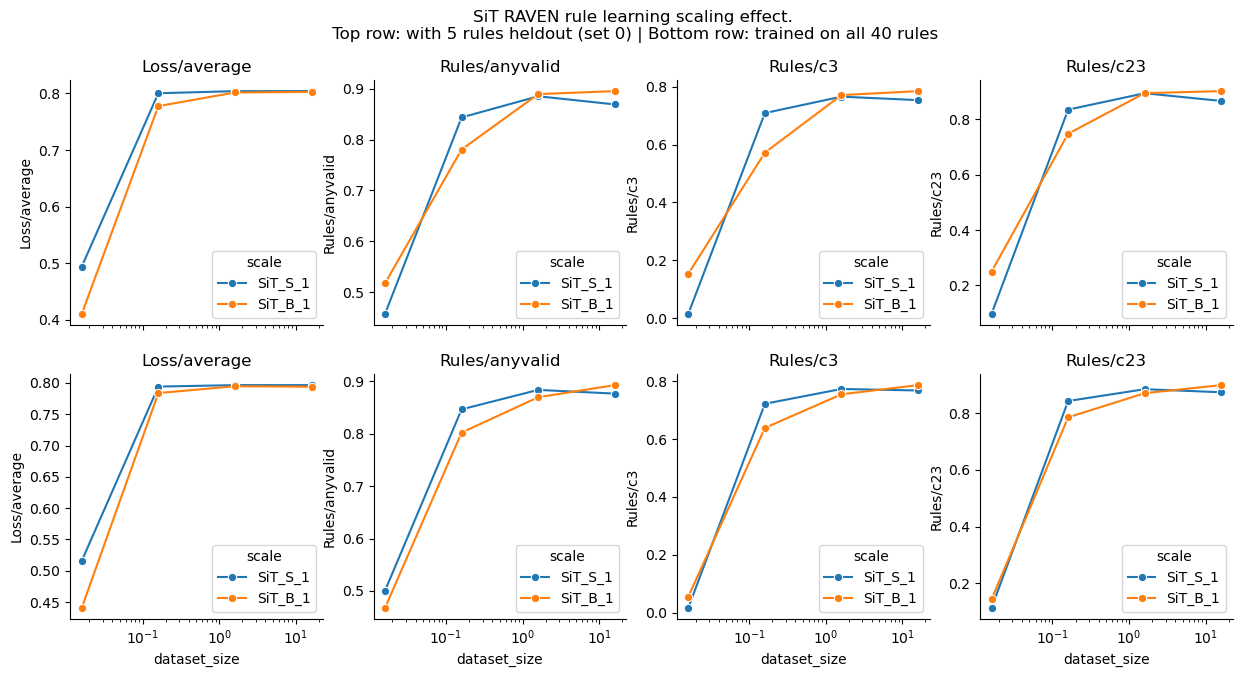

In [99]:
syndf_SiT_sorted = syndf_SiT.sort_values(by=["heldout", "scale", "dataset_size", ], ascending=[True, False, True, ])
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharex=True)
for ax, metric in zip(axs[0,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_SiT_sorted[syndf_SiT_sorted.heldout==True], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_SiT[syndf_SiT.heldout==True], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["SiT_S_1", "SiT_B_1"])
    ax.set_title(metric)
    ax.set_xscale('log')
for ax, metric in zip(axs[1,:], ["Loss/average", "Rules/anyvalid", "Rules/c3", "Rules/c23",]):
    # sns.barplot(data=syndf_SiT_sorted[syndf_SiT_sorted.heldout==False], x="scale", y=metric, hue="dataset_size", ax=ax)
    sns.lineplot(data=syndf_SiT[syndf_SiT.heldout==False], x="dataset_size", y=metric, hue="scale", ax=ax, marker="o", hue_order=["SiT_S_1", "SiT_B_1"])
    ax.set_title(metric)
    ax.set_xscale('log')
plt.suptitle("SiT RAVEN rule learning scaling effect.\n Top row: with 5 rules heldout (set 0) | Bottom row: trained on all 40 rules")
saveallforms(synopsisdir, "SiT_raven_rule_learning_scaling_effect", fig)
plt.show()

## Synopsis across model families

In [156]:
# load tables from the three families and concatenate them
syndf_EDM = pd.read_csv(join(tabdir, "EDM_raven_tensorboard_data_last10.csv"), index_col=0)
syndf_DiT = pd.read_csv(join(tabdir, "DiT_raven_tensorboard_data_last10.csv"), index_col=0)
syndf_SiT = pd.read_csv(join(tabdir, "SiT_raven_tensorboard_data_last10.csv"), index_col=0)
syndf_DiT["model_class"] = "DiT"
syndf_SiT["model_class"] = "SiT"
syndf_EDM["model_class"] = "EDM"
syndf_diff = pd.concat([syndf_EDM, syndf_DiT, syndf_SiT], axis=0)

In [157]:
syndf_diff
syndf_diff["dataset_size"] = syndf_diff.index.map(extract_and_convert)
syndf_diff["heldout"] = syndf_diff.index.map(lambda x: "_heldout0" in x)
syndf_diff["Rules/c23"] = syndf_diff["Rules/c2"] + syndf_diff["Rules/c3"]
syndf_diff["Rules/c23_cnt"] = syndf_diff["Rules/c2_cnt"] + syndf_diff["Rules/c3_cnt"]
syndf_diff["scale"] = None
syndf_diff.loc[syndf_diff.model_class=="EDM", "scale"] = syndf_diff[syndf_diff.model_class=="EDM"].index.map(lambda x: "EDMx3" if "BigBlnrX3" in x else "EDMx2" if "WideBlnrX3" in x else "EDMx1" if "BaseBlnrX3" in x else None)
syndf_diff.loc[syndf_diff.model_class=="DiT", "scale"] = syndf_diff[syndf_diff.model_class=="DiT"].index.map(lambda x: "DiT-B/1" if "DiT_B_1" in x else "DiT-S/1" if "DiT_S_1" in x else None)
syndf_diff.loc[syndf_diff.model_class=="SiT", "scale"] = syndf_diff[syndf_diff.model_class=="SiT"].index.map(lambda x: "SiT-B/1" if "SiT_B_1" in x else "SiT-S/1" if "SiT_S_1" in x else None)

In [158]:
from stats_plot_utils import estimate_CI


In [159]:
# evaluate the CI of rates
from stats_plot_utils import estimate_CI

syndf_diff["c3_CI_L"], syndf_diff["c3_CI_H"] = estimate_CI(syndf_diff["Rules/c3_cnt"] * 10, 10 * 2048, 0.05)
syndf_diff["c23_CI_L"], syndf_diff["c23_CI_H"] = estimate_CI(syndf_diff["Rules/c23_cnt"] * 10, 10 * 2048, 0.05)
syndf_diff["c2_CI_L"], syndf_diff["c2_CI_H"] = estimate_CI(syndf_diff["Rules/c2_cnt"] * 10, 10 * 2048, 0.05)
syndf_diff["valid_CI_L"], syndf_diff["valid_CI_H"] = estimate_CI(syndf_diff["Rules/anyvalid_cnt"] * 10, 3 * 10 * 2048, 0.05)

In [160]:
syndf_diff.to_csv(join(tabdir, "diffusion_family_comb_tensorboard_data_last10.csv"))    

In [169]:
syndf_diff.query("""dataset_size == 0.16 and heldout == True""")\
    [["dataset_size", "heldout", "step", "model_class", "scale", "Rules/anyvalid", "Rules/c3", "Rules/c23"]]

,dataset_size,heldout,step,model_class,scale,Rules/anyvalid,Rules/c3,Rules/c23
run_name,,,,,,,,
BaseBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx1,0.647087,0.259082,0.492920
BigBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx3,0.699447,0.408447,0.650195
BigBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx3,0.704215,0.409961,0.647607
WideBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx2,0.714290,0.445654,0.663428
090-uncond-DiT_S_1-stream0_16M_heldout0,0.16,True,1000000,DiT,DiT-S/1,0.747510,0.585352,0.720068
094-uncond-DiT_B_1-stream0_16M_heldout0,0.16,True,1000000,DiT,DiT-B/1,0.758219,0.589893,0.733496
014-SiT_S_1-stream0_16M_heldout0-Linear-velocity-None,0.16,True,1000000,SiT,SiT-S/1,0.843669,0.708887,0.835303
017-SiT_B_1-stream0_16M_heldout0-Linear-velocity-None,0.16,True,1000000,SiT,SiT-B/1,0.780518,0.572119,0.748291


In [168]:
syndf_diff.query("""dataset_size == 0.16 and heldout == True""")\
    [["dataset_size", "heldout", "step", "model_class", "scale", "valid_CI_L", "valid_CI_H", "c3_CI_L", "c3_CI_H", "c23_CI_L", "c23_CI_H"]]

,dataset_size,heldout,step,model_class,scale,valid_CI_L,valid_CI_H,c3_CI_L,c3_CI_H,c23_CI_L,c23_CI_H
run_name,,,,,,,,,,,
BaseBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx1,0.643311,0.650863,0.253076,0.265088,0.486084,0.499756
BigBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx3,0.695817,0.703076,0.401709,0.415186,0.643652,0.656738
BigBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx3,0.700602,0.707829,0.403223,0.416699,0.641064,0.654150
WideBlnrX3_new_stream0_16M_heldout0,0.16,True,999999,EDM,EDMx2,0.710710,0.717855,0.438867,0.452441,0.656934,0.669873
090-uncond-DiT_S_1-stream0_16M_heldout0,0.16,True,1000000,DiT,DiT-S/1,0.744076,0.750944,0.578613,0.592090,0.713916,0.726221
094-uncond-DiT_B_1-stream0_16M_heldout0,0.16,True,1000000,DiT,DiT-B/1,0.754834,0.761605,0.583154,0.596631,0.727441,0.739551
014-SiT_S_1-stream0_16M_heldout0-Linear-velocity-None,0.16,True,1000000,SiT,SiT-S/1,0.840788,0.846533,0.702637,0.715088,0.830225,0.840381
017-SiT_B_1-stream0_16M_heldout0-Linear-velocity-None,0.16,True,1000000,SiT,SiT-B/1,0.777246,0.783789,0.565332,0.578906,0.742334,0.754199


In [167]:
syndf_diff.query("""dataset_size == 0.16 and heldout == False""")\
    [["dataset_size", "heldout", "step", "model_class", "scale", "Rules/anyvalid", "Rules/c3", "Rules/c23"]]

,dataset_size,heldout,step,model_class,scale,Rules/anyvalid,Rules/c3,Rules/c23
run_name,,,,,,,,
BaseBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx1,0.641960,0.232520,0.467432
BigBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx3,0.722949,0.458154,0.680859
WideBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx2,0.735970,0.480225,0.690283
085-uncond-DiT_S_1-stream0_16M,0.16,False,1000000,DiT,DiT-S/1,0.753874,0.602930,0.725879
096-uncond-DiT_B_1-stream0_16M,0.16,False,1000000,DiT,DiT-B/1,0.764779,0.611182,0.742773
007-SiT_S_1-stream0_16M_all-Linear-velocity-None,0.16,False,1000000,SiT,SiT-S/1,0.846305,0.722168,0.842969
011-SiT_B_1-stream0_16M_all-Linear-velocity-None,0.16,False,942500,SiT,SiT-B/1,0.802018,0.638721,0.785449


In [166]:
syndf_diff.query("""dataset_size == 0.16 and heldout == False""")\
    [["dataset_size", "heldout", "step", "model_class", "scale", "valid_CI_L", "valid_CI_H", "c3_CI_L", "c3_CI_H", "c23_CI_L", "c23_CI_H"]]

,dataset_size,heldout,step,model_class,scale,valid_CI_L,valid_CI_H,c3_CI_L,c3_CI_H,c23_CI_L,c23_CI_H
run_name,,,,,,,,,,,
BaseBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx1,0.638167,0.645752,0.226758,0.238330,0.460596,0.474268
BigBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx3,0.719401,0.726481,0.451318,0.464990,0.674463,0.687256
WideBlnrX3_new_stream0_16M,0.16,False,999999,EDM,EDMx2,0.732487,0.739453,0.473389,0.487061,0.683936,0.696631
085-uncond-DiT_S_1-stream0_16M,0.16,False,1000000,DiT,DiT-S/1,0.750456,0.757275,0.596240,0.609619,0.719775,0.731982
096-uncond-DiT_B_1-stream0_16M,0.16,False,1000000,DiT,DiT-B/1,0.761426,0.768132,0.604492,0.617871,0.736768,0.748730
007-SiT_S_1-stream0_16M_all-Linear-velocity-None,0.16,False,1000000,SiT,SiT-S/1,0.843441,0.849154,0.716016,0.728271,0.837988,0.847949
011-SiT_B_1-stream0_16M_all-Linear-velocity-None,0.16,False,942500,SiT,SiT-B/1,0.798861,0.805160,0.632129,0.645312,0.779834,0.791064


In [113]:
syndf_diff[["scale", "model_class", "dataset_size", "heldout", "Rules/anyvalid", "Rules/c3", "Rules/c23"]]

,scale,model_class,dataset_size,heldout,Rules/anyvalid,Rules/c3,Rules/c23
run_name,,,,,,,
BigBlnrX3_new_stream0_016M,EDMx3,EDM,0.016,False,0.556755,0.054883,0.202637
BigBlnrX3_new_stream0_016M_heldout0,EDMx3,EDM,0.016,True,0.565934,0.079687,0.232471
BigBlnrX3_new_stream0_16M,EDMx3,EDM,0.160,False,0.722949,0.458154,0.680859
BigBlnrX3_new_stream0_16M_heldout0,EDMx3,EDM,0.160,True,0.704215,0.409961,0.647607
BigBlnrX3_new_stream0_16M_heldout0,EDMx3,EDM,0.160,True,0.699447,0.408447,0.650195
BigBlnrX3_new_stream0_48M,EDMx3,EDM,0.480,False,0.742480,0.582324,0.732227
BigBlnrX3_new_stream0_48M_heldout0,EDMx3,EDM,0.480,True,0.730680,0.581543,0.713184
BigBlnrX3_new_stream0_48M_heldout0,EDMx3,EDM,0.480,True,0.730111,0.581250,0.715137
BigBlnrX3_new_stream16M,EDMx3,EDM,16.000,False,0.746517,0.588037,0.729932


In [ ]:
import pandas as pd

def extract_last_K_step_avg_summary(tb_data_col, simplify_runname=None, exclude_runs=(), K=1, compute_std=False):
    """
    Extracts a summary by averaging over the last k steps for each tag in TensorBoard data.

    Parameters:
    - tb_data_col (dict): Dictionary where keys are run names and values are DataFrames with 'tag', 'step', and 'value' columns.
    - simplify_runname (callable, optional): Function to simplify run names. Defaults to None.
    - exclude_runs (tuple, optional): Runs to exclude from processing. Defaults to empty tuple.
    - k (int, optional): Number of last steps to average over. Defaults to 1.

    Returns:
    - pd.DataFrame: A DataFrame containing the averaged values per tag for each run.
    """
    # Initialize a list to collect per-run DataFrames
    result_list = []
    
    # Iterate over each run in the TensorBoard data collection
    for run_name, run_data in tb_data_col.items():
        if run_name in exclude_runs:
            print(f"Excluding {run_name}")
            continue
        
        # Ensure the data is sorted by step for each tag
        run_data_sorted = run_data.sort_values(by=['tag', 'step'])
        
        # Group by 'tag' and take the last k steps for each tag
        last_k_steps = run_data_sorted.groupby('tag').tail(K)
        
        # Compute the average 'value' for each tag over the last k steps
        averaged_values = last_k_steps.groupby('tag')['value'].mean().reset_index()
        
        # Get step information: max and min step in the last k steps per run
        step_info = last_k_steps.groupby('tag')['step'].agg(['max', 'min']).reset_index()
        max_step = step_info['max'].max()
        min_step = step_info['min'].min()
        
        # Assign the run name, simplified if a function is provided
        averaged_values["run_name"] = simplify_runname(run_name) if simplify_runname is not None else run_name
        
        # Pivot the DataFrame to have tags as columns
        pivot_df = averaged_values.pivot(index='run_name', columns='tag', values='value')
        
        # Add step information
        pivot_df["full_name"] = run_name
        pivot_df["step"] = max_step
        pivot_df["step/epoch"] = min_step
        # join the std values
        if compute_std:
            std_values = last_k_steps.groupby('tag')['value'].std().reset_index()
            std_values["run_name"] = simplify_runname(run_name) if simplify_runname is not None else run_name
            pivot_df_std = std_values.pivot(index='run_name', columns='tag', values='value')
            # rename columns
            pivot_df_std.columns = [f"{col}_std" for col in pivot_df_std.columns]
            pivot_df = pivot_df.join(pivot_df_std) 

        # Append the processed DataFrame to the result list
        result_list.append(pivot_df)
    
    # Concatenate all per-run DataFrames into a single DataFrame
    if result_list:
        result_df = pd.concat(result_list)
    else:
        result_df = pd.DataFrame()
    
    return result_df